<a href="https://colab.research.google.com/github/smomtahe/Deep_Neural_Network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
%tensorflow_version 2.x
import tensorflow as tf
import os
import io
import gzip
import math
import random
import operator
import sklearn.model_selection
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import seaborn as sb
from time import time
from itertools import chain
from subprocess import check_output
from collections import Counter
from PIL import Image
from math import ceil
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import parallel_coordinates
from scipy import optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Softmax, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from keras.optimizers import SGD
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
%matplotlib inline
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing.image import load_img, img_to_array
resnet_weights_path='https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h'



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unrar x "/content/toronto_face.rar"
# !cp  "/content/drive/MyDrive/data_to_process/male-female-face-dataset.rar"  ./

Mounted at /content/drive

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/toronto_face.rar

Creating    toronto_face                                              OK
Extracting  toronto_face/.DS_Store                                         0%  OK 
Extracting  toronto_face/toronto_face.npz                                 34% 69% 99%  OK 
All OK


In [ ]:
try:
    %tensorflow_version 2.x
    %load_ext tensorboard
    print('load tensflow 2.x and tensorboard')
except:
    print('not run code')

#load data
def load_data(file_name):
    npzfile = np.load(file_name)

    X_train = npzfile["inputs_train"].T / 255.0
    X_valid = npzfile["inputs_valid"].T / 255.0
    X_test = npzfile["inputs_test"].T / 255.0
    Y_train = npzfile["target_train"].tolist()
    Y_valid = npzfile["target_valid"].tolist()
    Y_test = npzfile["target_test"].tolist()

    num_class = max(Y_train + Y_valid + Y_test) + 1
    Y_train_1hot = np.zeros([num_class, len(Y_train)])
    Y_valid_1hot = np.zeros([num_class, len(Y_valid)])
    Y_test_1hot = np.zeros([num_class, len(Y_test)])

    for ii, xx in enumerate(Y_train):
        Y_train_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_valid):
        Y_valid_1hot[xx, ii] = 1.0

    for ii, xx in enumerate(Y_test):
        Y_test_1hot[xx, ii] = 1.0


    return X_train.T, X_valid.T, X_test.T, Y_train_1hot.T, Y_valid_1hot.T, Y_test_1hot.T

#*Run* the next cell to load the dataset you are going to use.
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_data("/content/toronto_face/toronto_face.npz")
from google.colab import drive
drive.mount('/content/drive')
print("train data shape",X_train.shape)
print("test data shape",X_test.shape)
print("validation data shape",X_valid.shape)


load tensflow 2.x and tensorboard
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train data shape (3374, 2304)
test data shape (385, 2304)
validation data shape (419, 2304)


In [ ]:
#train_data, test_data = resnet_weights_path()

In [ ]:

tf.keras.applications.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',)

96116736/96112376 [==============================] - 1s 0us/step


Data preparation

In [ ]:
!git clone https://github.com/laxmimerit/male-female-face-dataset.git

fatal: destination path 'male-female-face-dataset' already exists and is not an empty directory.


In [ ]:
epochs=50
lr=1e-3
batch_size=128
date=[]
labels=[]
size=224 #height/width
#image data generator
train_datagen=ImageDataGenerator(horizontal_flip=True,width_shift_range=0.4,
                                 height_shift_range=0.4,zoom_range=0.3,rotation_range=20,rescale=1/255)
test_gen=ImageDataGenerator(rescale=1/255)
target_size=(size,size)
target_size
train_generator=train_datagen.flow_from_directory(directory='/content/male-female-face-dataset/Training',
                                  target_size=target_size,
                                   class_mode='binary')
validation_generator=test_gen.flow_from_directory(directory='/content/male-female-face-dataset/Validation',
                                  target_size=target_size,
                                  class_mode='binary')
train_generator.class_indices

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


{'female': 0, 'male': 1}

In [ ]:
train_datagen=ImageDataGenerator(horizontal_flip=True,width_shift_range=0.4,
                                 height_shift_range=0.4,zoom_range=0.3,rotation_range=20,rescale=1/255)
test_gen=ImageDataGenerator(rescale=1/255)
target_size=(size,size)
target_size
train_generator=train_datagen.flow_from_directory(directory='/content/male-female-face-dataset/Training',
                                  target_size=target_size,
                                   class_mode='binary')
validation_generator=test_gen.flow_from_directory(directory='/content/male-female-face-dataset/Validation',
                                  target_size=target_size,
                                  class_mode='binary')
train_generator.class_indices
X_train=('/content/male-female-face-dataset/Training')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [ ]:
X_train,Y_train=train_generator.next()
X_valid,Y_valid=validation_generator.next()
X_train[0].shape # 1 img data %RGB colored img 3rd dimension


(224, 224, 3)

(1, 224, 224, 3)

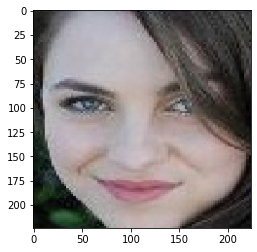

In [ ]:
#Test model
img_path='/content/male-female-face-dataset/Training/female/131422.jpg.jpg'
img=load_img(img_path,target_size=(size,size,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255.0
img=img.reshape(1,size,size,3)
img.shape

In [ ]:
'''
X_train_female  = '/content/male-female-face-dataset/Training/female'
Y_train_female  = 0
X_validation_female  = '/content/male-female-face-dataset/Validation/female'
Y_train_male  = 1
'''

"\nX_train_female  = '/content/male-female-face-dataset/Training/female'\nY_train_female  = 0\nX_validation_female  = '/content/male-female-face-dataset/Validation/female'\nY_train_male  = 1\n"

In [ ]:
#build ML model
model=Sequential()
model.add(InceptionV3(include_top=False, pooling='avg',weights="imagenet"))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.layers[0].trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_95 (Batc (None, 2048)              8192      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_96 (Batc (None, 1024)              4

In [ ]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
len((train_generator.filenames)), batch_size,len((train_generator.filenames))//batch_size,epochs

(47009, 128, 367, 50)

In [ ]:
model.fit(train_generator, steps_per_epoch=len((train_generator.filenames))//batch_size, epochs=1,
          validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)

367/367 [==============================] - 154s 405ms/step - loss: 0.4863 - accuracy: 0.8145 - val_loss: 0.2809 - val_accuracy: 0.8956


array([[0.00021323]], dtype=float32)

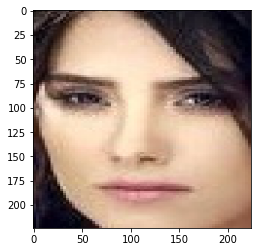

In [ ]:
#Test model
img_path='/content/male-female-face-dataset/Validation/female/112944.jpg.jpg'
img=load_img(img_path,target_size=(size,size,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255.0
img=img.reshape(1,size,size,3)
img.shape
model.predict(img)

In [ ]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [ ]:
def get_classes(data):
  prob=model.predict(img)[0][0]
  if prob<=0.5:
    return 'female', (1-prob)
  else:
    return 'male', prob
get_classes(img)

('female', 0.9997867681231583)

('male', 0.9989225)

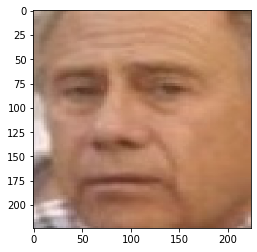

In [ ]:
#Test model
img_path='/content/male-female-face-dataset/Validation/male/063489.jpg.jpg'
img=load_img(img_path,target_size=(size,size,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255.0
img=img.reshape(1,size,size,3)
img.shape
model.predict(img)
def get_classes(data):
  prob=model.predict(img)[0][0]
  if prob<=0.5:
    return 'female', (1-prob)
  else:
    return 'male', (prob)
get_classes(img)

In [ ]:
#build ML model which reduced overfitting
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

model=Sequential()
model.add(InceptionV3(include_top=False, pooling='avg',weights="imagenet"))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))

model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.layers[0].trainable=False

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
len((train_generator.filenames)), batch_size,len((train_generator.filenames))//batch_size,epochs

model.fit(train_generator, steps_per_epoch=len((train_generator.filenames))//batch_size, epochs=1,
          validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)


367/367 [==============================] - 149s 396ms/step - loss: 0.4623 - accuracy: 0.8157 - val_loss: 0.2556 - val_accuracy: 0.9038


('female', 0.9978414638899267)

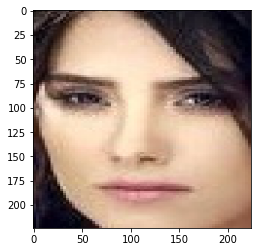

In [ ]:
#Test model female
img_path='/content/male-female-face-dataset/Validation/female/112944.jpg.jpg'
img=load_img(img_path,target_size=(size,size,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255.0
img=img.reshape(1,size,size,3)
img.shape
model.predict(img)

def get_classes(data):
  prob=model.predict(img)[0][0]
  if prob<=0.5:
    return 'female', (1-prob)
  else:
    return 'male', prob
get_classes(img)


('male', 0.9990177)

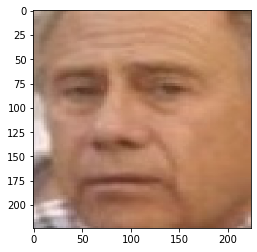

In [ ]:
#Test model male
img_path='/content/male-female-face-dataset/Validation/male/063489.jpg.jpg'
img=load_img(img_path,target_size=(size,size,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255.0
img=img.reshape(1,size,size,3)
img.shape
model.predict(img)
def get_classes(data):
  prob=model.predict(img)[0][0]
  if prob<=0.5:
    return 'female', (1-prob)
  else:
    return 'male', (prob)
get_classes(img)